# **Исследование данных о популярности и продаваемости игр**

В данном исследовании мы проверим исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах с целью выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина "Стримчик".

**Основные задачи проекта:** 

- определим наиболее популярные платформы;
- определим, какие жанры пользуются наибольшей популярностью;
- проверим, какие факторы влияют на продажи игр (платформа/жанр/оценки критиков и пользователей/рейтинг от организации ESRB).

**Также мы проверим отличаются ли продажи и популярность определённых платформ и жанров игр в разных регионах - Северной Америке, Европе и Японии.**

**Проверим гипотезы:**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Подведём итоги исследования и дадим рекомендации по планированию рекламной кампании.**


## Подготовка и предобработка данных 

In [1]:
#импортируем библиотеки, которые нам понадобятся в нашем исследовании 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
game_data = pd.read_csv('/datasets/games.csv')

In [3]:
display(game_data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#посмотрим на объём данных и общую информацию о таблице при помощи метода info()

game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь мы можем выделить для себя самые очевидные проблемы в данных, с которыми нужно будет разобраться в первую очередь:

- поищем явные и неявные дубликаты в данных
- изменим названия столбцов (приведём названия к нижнему регистру) 
- поработаем с пропусками в данных
- приведём данные к нужным типам 

In [5]:
#посчитаем количество явных дубликатов с помощью методов duplicated() и sum()

game_data.duplicated().sum()

0

In [6]:
#изменим названия столбцов с помощью метода rename()

game_data = game_data.rename(columns={
    'Name':'name', 
    'Platform':'platform', 
    'Year_of_Release':'year_of_release', 
    'Genre':'genre', 
    'NA_sales':'north_america_sales', 
    'EU_sales':'europe_sales', 
    'JP_sales':'japan_sales', 
    'Other_sales':'other_sales', 
    'Critic_Score':'critic_score', 
    'User_Score':'user_score', 
    'Rating':'rating'})

In [7]:
#проверим результат изменения названий столбцов - применим метод columns, который вызовет перечень названий столбцов 

game_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'north_america_sales',
       'europe_sales', 'japan_sales', 'other_sales', 'critic_score',
       'user_score', 'rating'],
      dtype='object')

Для проверки на неявные дубликаты мы применим к каждому столбцу следующие методы: 
* value_counts() для подсчёта уникальных значений, в параметрах к методу запишем dropna=False для включения в подсчёт NaN значений
* метод sort_index с параметром ascending=True отсортирует данные в алфавитном порядке
* метод to_frame() выведет результат в формате Dataframe 

Пройдёмся по всем столбцам, чтобы проверить их и устранить в них проблемы.

In [8]:
game_data['name'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,name
Beyblade Burst,1
Fire Emblem Fates,1
Frozen: Olaf's Quest,2
Haikyu!! Cross Team Match!,1
Tales of Xillia 2,1
...,...
uDraw Studio,1
uDraw Studio: Instant Artist,2
wwe Smackdown vs. Raw 2006,1
¡Shin Chan Flipa en colores!,1


In [9]:
game_data = game_data[game_data['name'].notna()]
game_data['name'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,name
Beyblade Burst,1
Fire Emblem Fates,1
Frozen: Olaf's Quest,2
Haikyu!! Cross Team Match!,1
Tales of Xillia 2,1
...,...
thinkSMART: Chess for Kids,1
uDraw Studio,1
uDraw Studio: Instant Artist,2
wwe Smackdown vs. Raw 2006,1


In [10]:
game_data['platform'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,platform
2600,133
3DO,3
3DS,520
DC,52
DS,2151
GB,98
GBA,822
GC,556
GEN,27
GG,1


**С этим столбцом всё в порядке, перейдём к следующему.**

In [11]:
game_data['year_of_release'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,year_of_release
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15
1989.0,17


In [12]:
#посмотрим на жизненный срок платформы

years_of_life = game_data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


In [13]:
#проверим, к каким платформам относятся пропуски

game_data[game_data['year_of_release'].isna()]['platform'].unique()

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [14]:
#с помощью логической индексации и метода notna() избавимся от пропусков в данных

game_data = game_data[game_data['year_of_release'].notna()]

In [15]:
#изменим тип данных на целочисленный и проверим результат

game_data['year_of_release'] = game_data['year_of_release'].astype('int')
game_data['year_of_release'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,year_of_release
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15
1989,17


In [16]:
years_of_life = game_data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [17]:
game_data['genre'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,genre
Action,3307
Adventure,1293
Fighting,837
Misc,1721
Platform,878
Puzzle,569
Racing,1226
Role-Playing,1481
Shooter,1296
Simulation,857


In [18]:
game_data = game_data[game_data['genre'].notna()]
game_data['genre'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,genre
Action,3307
Adventure,1293
Fighting,837
Misc,1721
Platform,878
Puzzle,569
Racing,1226
Role-Playing,1481
Shooter,1296
Simulation,857


In [19]:
game_data['north_america_sales'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,north_america_sales
0.00,4449
0.01,530
0.02,562
0.03,554
0.04,543
...,...
15.68,1
23.20,1
26.93,1
29.08,1


**Пока что не будем трогать столбцы с продажами, тип float в данном случае пригодится для более точных рассчётов продаж игр.**

In [20]:
game_data['europe_sales'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,europe_sales
0.00,5766
0.01,1467
0.02,1290
0.03,911
0.04,702
...,...
9.20,1
10.93,1
10.95,1
12.76,1


In [21]:
game_data['japan_sales'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,japan_sales
0.00,10300
0.01,697
0.02,733
0.03,540
0.04,391
...,...
6.04,1
6.50,1
6.81,1
7.20,1


In [22]:
game_data['other_sales'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,other_sales
0.00,6492
0.01,3398
0.02,1596
0.03,910
0.04,641
...,...
3.29,1
3.96,1
7.53,1
8.45,1


In [23]:
game_data['critic_score'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,critic_score
13.0,1
17.0,1
19.0,6
20.0,3
21.0,1
...,...
95.0,16
96.0,18
97.0,11
98.0,4


In [25]:
game_data['user_score'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,user_score
0,1
0.2,2
0.3,2
0.5,2
0.6,2
...,...
9.5,5
9.6,2
9.7,1
tbd,2376


**Аббревиатура 'tbd' означает, что данные не определены, поэтому не попали ни в одну из категорий - ни в определённую оценку, ни в NaN. Также, в этом столбце тип данных object, это нужно поменять. Изменим тип данных на float64 с помощью метода to_numeric, аргументом к которому пропишем errors='coerce' - тогда значения из tbd принудительно заменятся на NaN; после этого мы сможем заполнить пропуски медианой.**

In [26]:
game_data['user_score'] = pd.to_numeric(game_data['user_score'], errors = 'coerce')     
game_data['user_score'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,user_score
0.0,1
0.2,2
0.3,2
0.5,2
0.6,2
...,...
9.4,11
9.5,5
9.6,2
9.7,1


In [27]:
game_data['rating'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,rating
AO,1
E,3921
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2905
NaN,6676


**Заметим, что большинство игр имеет рейтинги E и T.** 

**В этом столбце так же очень много пропусков, с которыми нужно поработать. 
Скорее всего эти пропуски, как и в предыдущих двух столбцах, с которыми мы работали - *случайные*. Заменим пропуски в этом столбце на значение "unknown".** 

In [28]:
game_data['rating'] = game_data['rating'].fillna('unknown')
game_data['rating'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,rating
AO,1
E,3921
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2905
unknown,6676


**Объединим некоторые рейтинги в один:**



- **M** и **AO** объединим в **M** (только для взрослых)
- **E**, **RP** и **K-A** объединим в **E** (для всех)

In [29]:
game_data.loc[game_data['rating'] == 'AO', 'rating'] = 'M'
game_data.loc[game_data['rating'] == 'K-A', 'rating'] = 'E'
game_data.loc[game_data['rating'] == 'RP', 'rating'] = 'E'
game_data.loc[game_data['rating'] == 'EC', 'rating'] = 'T'
game_data['rating'].value_counts(dropna=False).sort_index(ascending=True).to_frame()

,rating
E,3925
E10+,1393
M,1537
T,2913
unknown,6676


**Посчитаем суммарные продажи во всех регионах. Создадим для этого новый столбец в нашей таблице.**

In [30]:
game_data['total_sales'] = game_data['north_america_sales'] + game_data['japan_sales'] + game_data['europe_sales'] + game_data['other_sales']
display(game_data)

,name,platform,year_of_release,genre,north_america_sales,europe_sales,japan_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


## Исследовательский анализ данных.

**Проверим, сколько игр выпускалось в разные годы и определим, важны ли нам данные за все периоды.**

In [32]:
#будем использовать сводные таблицы

game_data.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


**Первые выводы по данным:**

- с 1994 года началася уверенный рост в числе выпускаемых игр
- самые высокие показатели выпуска игр в период с 2007 до 2009

**Посмотрим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
Определим, за какой характерный срок появляются новые и исчезают старые платформы.**

In [33]:
game_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')

,total_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


**Платформы с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS. Построим график и определим актуальный период, который возьмём для дальнейшего исследования.** 

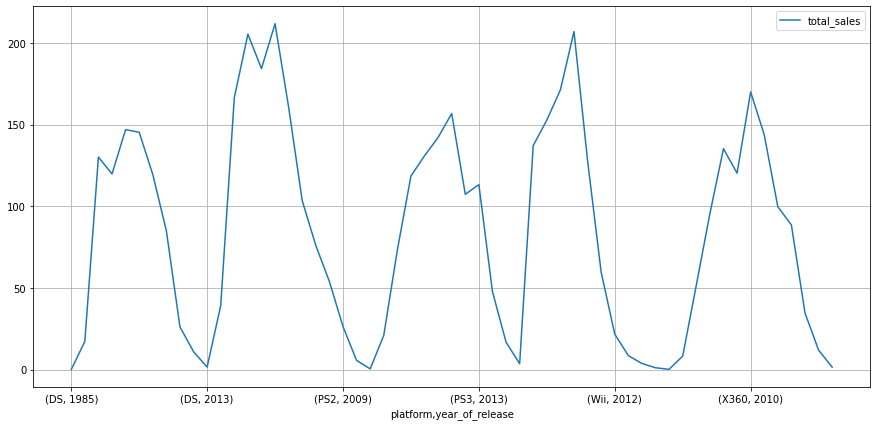

In [34]:
most_sales = game_data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS"]')
most_sales.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7));

**Возьмём данные за период с 2013 по 2015 гг.**

**Определим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [35]:
#с помощью среза данных и сводной таблицы проанализируем данные

game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='platform', values='total_sales', aggfunc='sum')

,total_sales
platform,
3DS,128.11
DS,1.54
PC,34.18
PS3,177.83
PS4,244.89
PSP,3.50
PSV,28.74
Wii,13.48
WiiU,60.03


**Судя по сводной таблице, потенциально прибыльные платформы - PS4, PS3, X360, XOne и 3DS.**

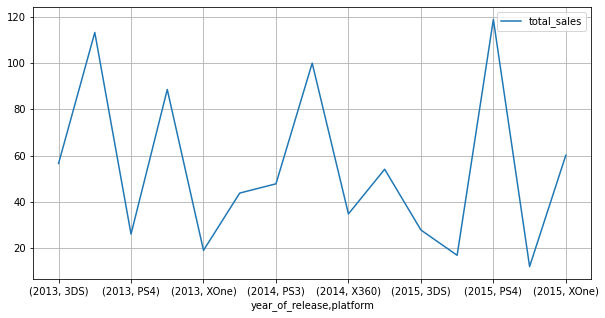

In [36]:
most_pop = game_data.query('platform == ["PS4", "X360", "PS3", "3DS", "XOne"]')
most_pop.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 5));

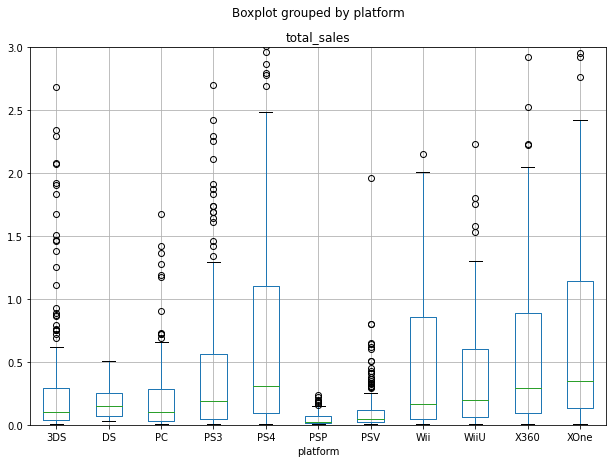

In [38]:
#построим "ящик с усами"

game_data.query('year_of_release >= 2013 and year_of_release <= 2015').boxplot(column='total_sales', by='platform', figsize=(10, 7)).set(ylim=(0,3));

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для анализа возьмём четыре самые популярные платформы - PS4, X360, PS3 и XOne.**

*Будем использовать диаграмму рассеяния для наглядности и корреляцию Пирсона для более точной оценки.*

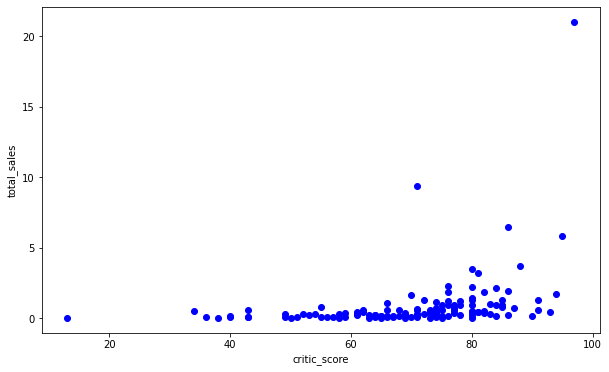

In [40]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "PS3"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['critic_score'], y = score_and_sale['total_sales'], color='blue')
plt.xlabel("critic_score")
plt.ylabel("total_sales")

plt.show()

In [41]:
score_and_sale['critic_score'].corr(score_and_sale['total_sales'])

0.3342853393371919

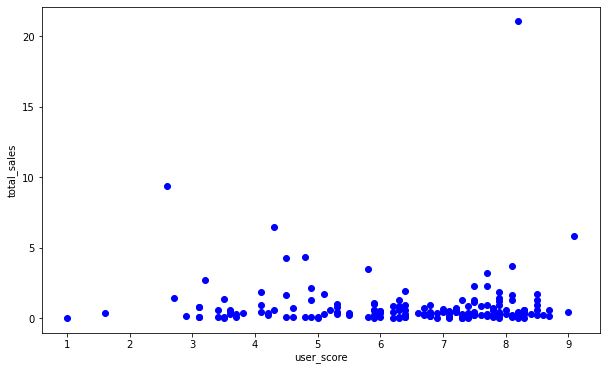

In [42]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "PS3"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['user_score'], y = score_and_sale['total_sales'], color='blue')
plt.xlabel("user_score")
plt.ylabel("total_sales")

plt.show()

In [43]:
score_and_sale['user_score'].corr(score_and_sale['total_sales'])

-0.016332728343513417

**Промежуточный вывод после сравнения: корреляцию между оценками пользователей/критиков и продажами можно назвать слабой.**

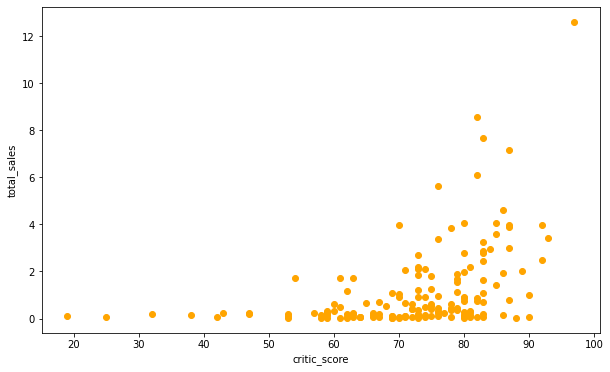

In [44]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "PS4"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['critic_score'], y = score_and_sale['total_sales'], color='orange')
plt.xlabel("critic_score")
plt.ylabel("total_sales")

plt.show()

In [45]:
score_and_sale['critic_score'].corr(score_and_sale['total_sales'])

0.43184820499820054

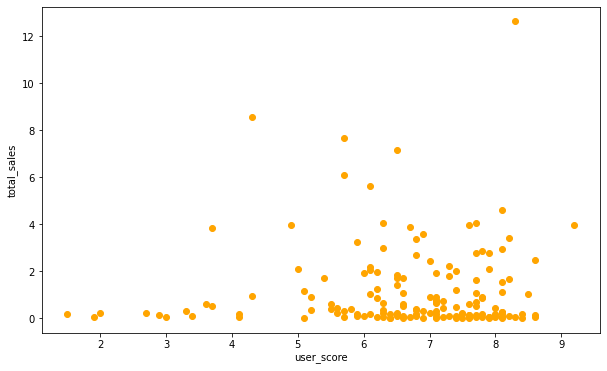

In [46]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "PS4"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['user_score'], y = score_and_sale['total_sales'], color='orange')
plt.xlabel("user_score")
plt.ylabel("total_sales")

plt.show()

In [47]:
score_and_sale['user_score'].corr(score_and_sale['total_sales'])

0.02423083236062255

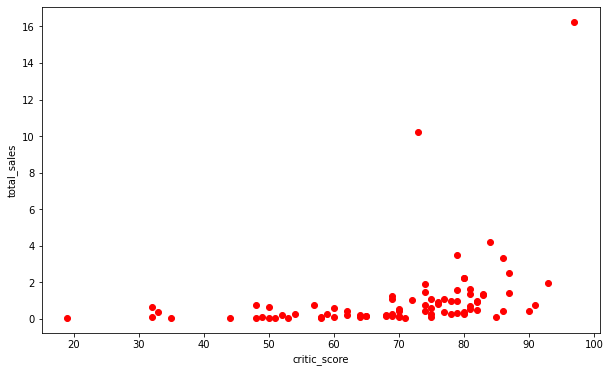

In [48]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "X360"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['critic_score'], y = score_and_sale['total_sales'], color='red')
plt.xlabel("critic_score")
plt.ylabel("total_sales")

plt.show()

In [49]:
score_and_sale['critic_score'].corr(score_and_sale['total_sales'])

0.3503445460228664

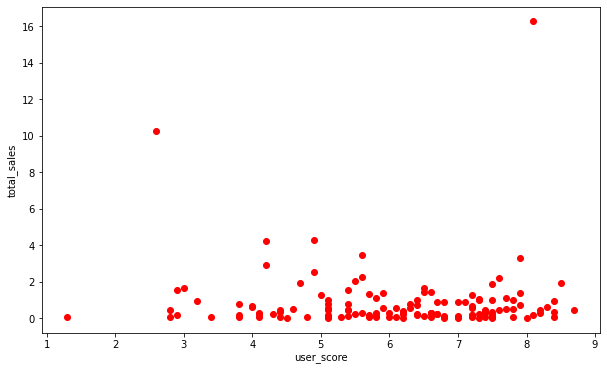

In [50]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "X360"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['user_score'], y = score_and_sale['total_sales'], color='red')
plt.xlabel("user_score")
plt.ylabel("total_sales")

plt.show()

In [51]:
score_and_sale['user_score'].corr(score_and_sale['total_sales'])

-0.034562454100238206

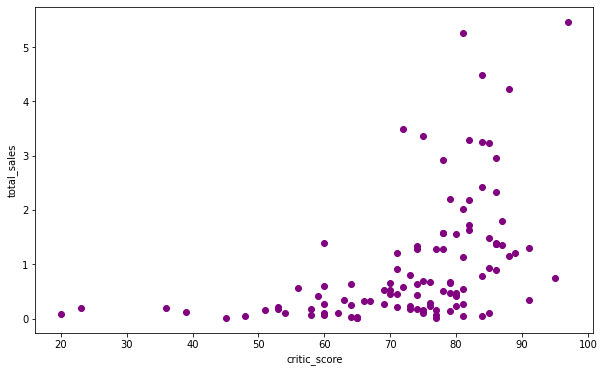

In [52]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "XOne"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['critic_score'], y = score_and_sale['total_sales'], color='purple')
plt.xlabel("critic_score")
plt.ylabel("total_sales")

plt.show()

In [53]:
score_and_sale['critic_score'].corr(score_and_sale['total_sales'])

0.45938456807071054

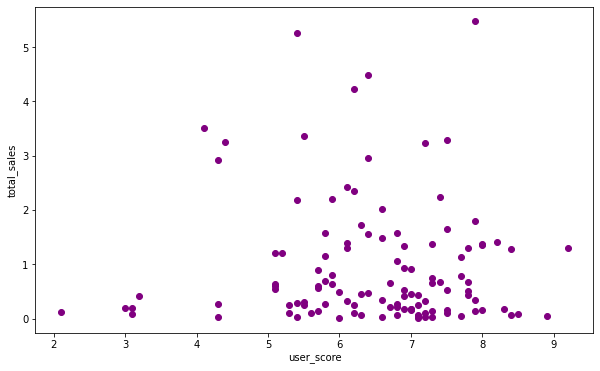

In [54]:
score_and_sale = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
score_and_sale = score_and_sale.query('platform == "XOne"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = score_and_sale['user_score'], y = score_and_sale['total_sales'], color='purple')
plt.xlabel("user_score")
plt.ylabel("total_sales")

plt.show()

In [55]:
score_and_sale['user_score'].corr(score_and_sale['total_sales'])

-0.03926828544552199

**Вывод: анализ самых популярных платформ показал, что корреляция между оценками пользователей/критиков и продажами достаточно слабая и оценки не являются критическим фактором для больших продаж.**

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [56]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='genre', values='total_sales', aggfunc='sum')

,total_sales
genre,
Action,291.76
Adventure,19.82
Fighting,30.84
Misc,60.22
Platform,39.40
Puzzle,3.16
Racing,37.10
Role-Playing,127.71
Shooter,194.76


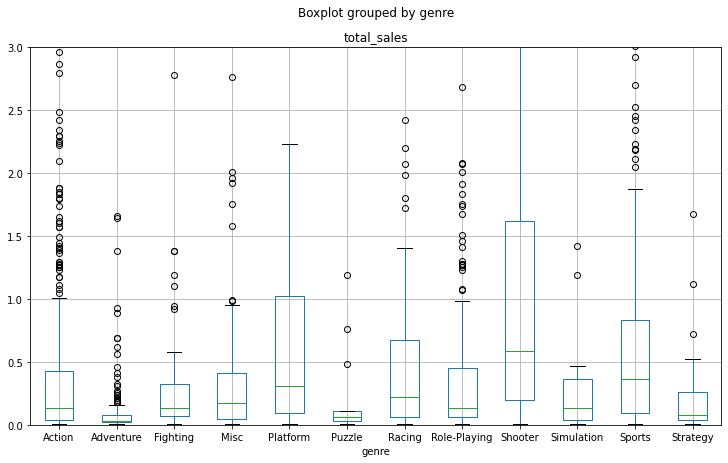

In [57]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').boxplot(column='total_sales', by='genre', figsize=(12, 7)).set(ylim=(0,3));

**Самые прибыльные жанры - Action, shooter, role-playing и sports. Самые низкие продажи у 'adventure', 'puzzle', 'strategy' и 'simulation'.**

## Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**

- самые популярные платформы (топ-5). Опишите различия в долях продаж.
- самые популярные жанры (топ-5). Поясните разницу.
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [58]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='platform', values='north_america_sales', aggfunc='sum')

,north_america_sales
platform,
3DS,34.06
DS,0.57
PC,9.75
PS3,62.83
PS4,87.25
PSP,0.00
PSV,4.89
Wii,6.50
WiiU,27.11


In [59]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='platform', values='europe_sales', aggfunc='sum')

,europe_sales
platform,
3DS,28.63
DS,0.85
PC,21.83
PS3,66.55
PS4,109.31
PSP,0.17
PSV,5.71
Wii,5.82
WiiU,18.37


In [60]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='platform', values='japan_sales', aggfunc='sum')

,japan_sales
platform,
3DS,59.78
DS,0.00
PC,0.00
PS3,22.05
PS4,10.22
PSP,3.29
PSV,15.03
Wii,0.05
WiiU,10.21


In [61]:
import warnings
warnings.filterwarnings("ignore")

actual_period = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
na_sales_top = actual_period.pivot_table(index='platform', columns=None, values='north_america_sales', aggfunc='sum').sort_values('north_america_sales', ascending=False).query('north_america_sales > 34')
actual_period['top_platform_north_america'] = (actual_period['platform'].where(actual_period['platform'].isin(na_sales_top.index), 'Другие'))
na_sales = actual_period.pivot_table(index=['top_platform_north_america'], columns=None, values='north_america_sales', aggfunc='sum').sort_values('north_america_sales', ascending=False)

In [62]:
import warnings
warnings.filterwarnings("ignore")

actual_period = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
eu_sales_top = actual_period.pivot_table(index='platform', columns=None, values='europe_sales', aggfunc='sum').sort_values('europe_sales', ascending=False).query('europe_sales > 28')
actual_period['top_platform_europe'] = (actual_period['platform'].where(actual_period['platform'].isin(eu_sales_top.index), 'Другие'))
eu_sales = actual_period.pivot_table(index=['top_platform_europe'], columns=None, values='europe_sales', aggfunc='sum').sort_values('europe_sales', ascending=False)

In [63]:
import warnings
warnings.filterwarnings("ignore")

actual_period = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
jp_sales_top = actual_period.pivot_table(index='platform', columns=None, values='japan_sales', aggfunc='sum').sort_values('japan_sales', ascending=False).query('japan_sales > 10')
actual_period['top_platform_japan'] = (actual_period['platform'].where(actual_period['platform'].isin(jp_sales_top.index), 'Другие'))
jp_sales = actual_period.pivot_table(index='top_platform_japan', columns=None, values='japan_sales', aggfunc='sum').sort_values('japan_sales', ascending=False)

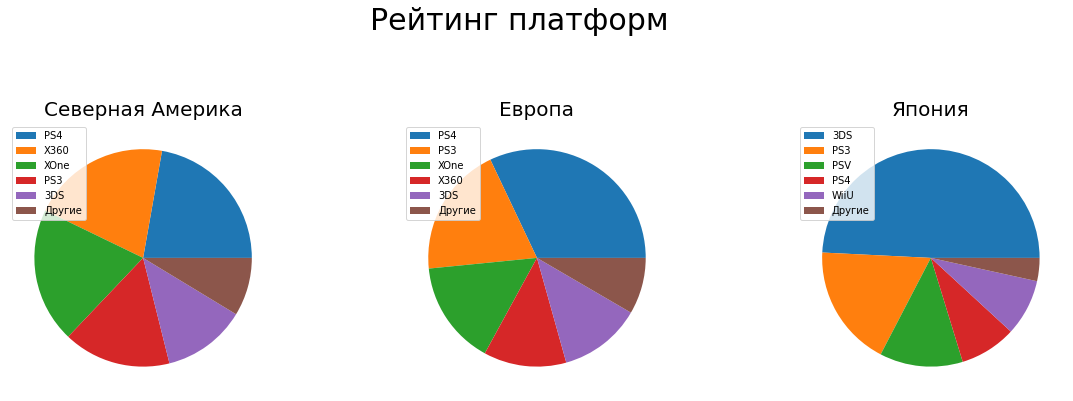

In [64]:
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Рейтинг платформ',
             y = 1.2,
             fontsize = 30)

ax1.pie(na_sales['north_america_sales'])
ax1.set_title('Северная Америка', fontsize = 20)
labels = ['PS4', 'X360', 'XOne', 'PS3', '3DS', 'Другие']
ax1.legend(labels, loc="upper left")

ax2.pie(eu_sales['europe_sales'])
ax2.set_title('Европа', fontsize = 20)
labels = ['PS4', 'PS3', 'XOne', 'X360', '3DS', 'Другие']
ax2.legend(labels, loc="upper left")

ax3.pie(jp_sales['japan_sales'])
ax3.set_title('Япония', fontsize = 20)
labels = ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU', 'Другие']
ax3.legend(labels, loc="upper left")

plt.show()

In [67]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='genre', values='north_america_sales', aggfunc='sum')

,north_america_sales
genre,
Action,116.76
Adventure,6.19
Fighting,13.71
Misc,26.73
Platform,16.85
Puzzle,0.83
Racing,12.23
Role-Playing,40.51
Shooter,93.50


In [68]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='genre', values='europe_sales', aggfunc='sum')

,europe_sales
genre,
Action,107.45
Adventure,6.93
Fighting,7.21
Misc,19.38
Platform,14.19
Puzzle,0.99
Racing,18.42
Role-Playing,32.69
Shooter,71.96


In [69]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='genre', values='japan_sales', aggfunc='sum')

,japan_sales
genre,
Action,33.42
Adventure,4.64
Fighting,6.90
Misc,8.16
Platform,4.68
Puzzle,1.18
Racing,2.29
Role-Playing,44.43
Shooter,5.55


In [70]:
actual_period = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
na_sales_top = actual_period.pivot_table(index='genre', columns=None, values='north_america_sales', aggfunc='sum').sort_values('north_america_sales', ascending=False).query('north_america_sales >= 26.73')
actual_period['top_genre_north_america'] = (actual_period['genre'].where(actual_period['genre'].isin(na_sales_top.index), 'Другие'))
na_sales = actual_period.pivot_table(index=['top_genre_north_america'], columns=None, values='north_america_sales', aggfunc='sum').sort_values('north_america_sales', ascending=False)

In [71]:
actual_period = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
eu_sales_top = actual_period.pivot_table(index='genre', columns=None, values='europe_sales', aggfunc='sum').sort_values('europe_sales', ascending=False).query('europe_sales >= 19.38')
actual_period['top_genre_europe'] = (actual_period['genre'].where(actual_period['genre'].isin(eu_sales_top.index), 'Другие'))
eu_sales = actual_period.pivot_table(index=['top_genre_europe'], columns=None, values='europe_sales', aggfunc='sum').sort_values('europe_sales', ascending=False)

In [72]:
actual_period = game_data.query('year_of_release >= 2013 and year_of_release <= 2015')
jp_sales_top = actual_period.pivot_table(index='genre', columns=None, values='japan_sales', aggfunc='sum').sort_values('japan_sales', ascending=False).query('japan_sales > 5')
actual_period['top_genre_japan'] = (actual_period['genre'].where(actual_period['genre'].isin(jp_sales_top.index), 'Другие'))
jp_sales = actual_period.pivot_table(index='top_genre_japan', columns=None, values='japan_sales', aggfunc='sum').sort_values('japan_sales', ascending=False)

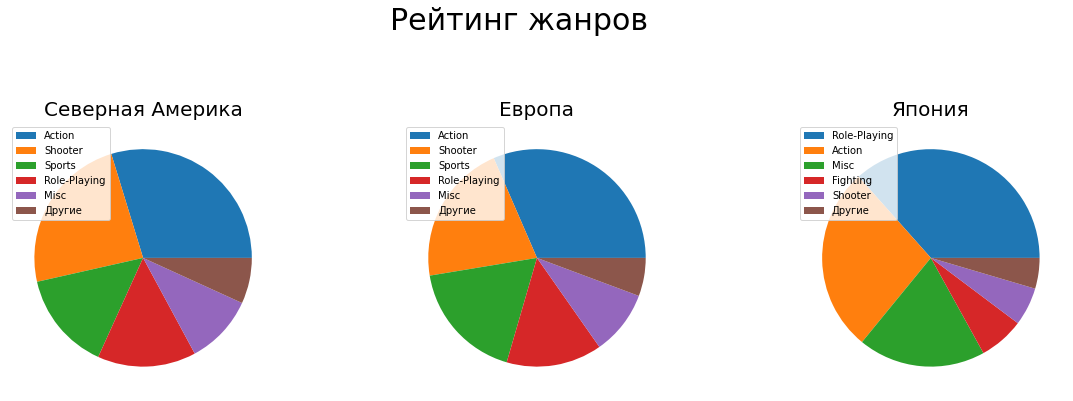

In [73]:
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Рейтинг жанров',
             y = 1.2,
             fontsize = 30)

ax1.pie(na_sales['north_america_sales'])
ax1.set_title('Северная Америка', fontsize = 20)
labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Другие']
ax1.legend(labels, loc="upper left")

ax2.pie(eu_sales['europe_sales'])
ax2.set_title('Европа', fontsize = 20)
labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Другие']
ax2.legend(labels, loc="upper left")

ax3.pie(jp_sales['japan_sales'])
ax3.set_title('Япония', fontsize = 20)
labels = ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter', 'Другие']
ax3.legend(labels, loc="upper left")

plt.show()

**Вывод:**

**Северная Америка и Европа достаточно похожи между собой:**

- первые четыре места по жанрам у них сходятся: **Action**, **Shooter**, **Sports** и **Role-Playing**
- самая популярная платформа - **PS4**; также в топ-5 входят одни и те же платформы, разница лишь в месте в топе

**Япония несколько отличается от двух других рассматриваемых регионов:**

- на первом месте по жанру у Японии **Role-Playing**, который у Америки и Европы на 4-ом месте, а на последнем - **Shooter**, находящийся на втором месте у Америки и Европы
- самая популярная платформа - **3DS**, у Америки и Европы она на последнем месте в топ-5; также, в топ вошли две платформы, которых нет в пятёрке у Америки и Европы - **PSV** и **WiiU**

In [74]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='rating', values='north_america_sales', aggfunc='sum')

,north_america_sales
rating,
E,71.08
E10+,50.43
M,149.54
T,40.84
unknown,80.89


In [75]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='rating', values='europe_sales', aggfunc='sum')

,europe_sales
rating,
E,69.75
E10+,38.88
M,128.78
T,32.16
unknown,71.44


In [76]:
game_data.query('year_of_release >= 2013 and year_of_release <= 2015').pivot_table(index='rating', values='japan_sales', aggfunc='sum')

,japan_sales
rating,
E,14.07
E10+,5.44
M,12.91
T,18.32
unknown,70.73


**В Северной Америке и Европе большинство проданных копий у игр с рейтингом M, на втором месте игры с неизвестным рейтингом. В Японии на первом месте по продажам игры с неизвестным рейтингом, на втором - с рейтингом T.**

## Формулирование и проверка гипотез

**Проверим гипотезы:**

**1.** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


**2.** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# **1.**

**H_0: Средние пользовательские рейтинги платформ Xbox One и PC равны**

**H_a: Средние пользовательские рейтинги платформ Xbox One и PC не равны**

Значение alpha возьмём 0.05

In [77]:
#сохраним нужные срезы по интересующим нас платформам и с помощью st.ttest_ind проведём тест для подтверждения или опровержения
#нашей нулевой гипотезы
game_data = game_data[game_data['user_score'].notna()]
actual_data = game_data.query('year_of_release >= 2013 and year_of_release <= 2016')

xbox_one_platform = actual_data.query('platform == "XOne"')
pc_platform = actual_data.query('platform == "PC"')
result = st.ttest_ind(xbox_one_platform['user_score'], pc_platform['user_score'], equal_var=False)

alpha = 0.05 

print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод: полученное p-значение говорит о том, средние пользовательские рейтинги рассматриваемых платформ хоть и не равны, с вероятностью в почти 15% такое или большее различие можно получить случайно, поэтому мы не можем сделать вывод о критическом различии средних пользовательских рейтингов на платформах Xbox One и PC**

**2.**

H_0: Средние пользовательские рейтинги жанров Action и Sports равны

H_a: Средние пользовательские рейтинги жанров Action и Sports не равны

Значение alpha возьмём 0.05

In [80]:
game_data = game_data[game_data['user_score'].notna()]
actual_data = game_data.query('year_of_release >= 2013 and year_of_release <= 2016')

action_genre = actual_data.query('genre == "Action"')
sports_genre = actual_data.query('genre == "Sports"')
result = st.ttest_ind(action_genre['user_score'], sports_genre['user_score'], equal_var=False)

alpha = 0.05 

print(result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод: p-значение сильно меньше значения альфа, следовательно мы отвергаем нулевую гипотезу и делаем вывод о том, что средние пользовательские рейтинги жанров Action и Sports не равны**

# Общий вывод

**На основе проведённого исследования можно сделать следующий вывод и дать магазину "Стримчик" следующие рекомендации для планирования рекламной кампании:**


- Наиболее популярные игровые платформы - **PS4**, **X360** и **XOne**, а для японского рынка стоит обратить внимание на **3DS**, так как эта платформа там наиболее популярна.

- Игры в жанре **shooter** и **action** показали хорошие продажи в Европе и Америке, на них стоит обратить внимание, в Японии самый популярный жанр - **role-playing**. 

- Как показало исследование, оценки пользователей слабо влияют на продажи, на оценки критиков можно обратить внимание, но и они напрямую не влияют на продажи.

- Рейтинг **M** можно считать желаемым для хороших продаж. 